<a href="https://colab.research.google.com/github/canaranjo23/AA-IG-CamiloNaranjo/blob/main/TP5_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación y visualización de datos

El aprendizaje automático trata de ajustar modelos a los datos; por esta razón, empezaremos discutiendo como los datos pueden ser representados para ser accesibles por el ordenador. Además de esto, nos basaremos en los ejemplos de matplotlib de la sección anterior para usarlos para representar datos.

## Datos en scikit-learn

Los datos en scikit-learn, salvo algunas excepciones, suelen estar almacenados en 
**arrays de 2 dimensiones**, con forma `[n_samples, n_features]`. Muchos algoritmos aceptan también matrices ``scipy.sparse`` con la misma forma.

- **n_samples:** este es el número de ejemplos. Cada ejemplo es un item a procesar (por ejemplo, clasificar). Un ejemplo puede ser un documento, una imagen, un sonido, un vídeo, un objeto astronómico, una fila de una base de datos o de un fichero CSV, o cualquier cosa que se pueda describir usando un conjunto prefijado de trazas cuantitativas.
- **n_features:** este es el número de características descriptoras que se utilizan para describir cada item de forma cuantitativa. Las características son, generalmente, valores reales, aunque pueden ser categóricas o valores discretos.

El número de características debe ser fijado de antemano. Sin embargo, puede ser extremadamente alto (por ejemplo, millones de características), siendo cero en la mayoría de casos. En este tipo de datos, es buena idea usar matrices `scipy.sparse` que manejan mucho mejor la memoria.

Como ya comentamos en la sección anterior, representamos los ejemplos (puntos o instancias) como filas en el array de datos y almacenamos las características correspondientes, las "dimensiones", como columnas.

### Un ejemplo simple: el dataset Iris

Como ejemplo de un dataset simple, vamos a echar un vistazo al conjunto iris almacenado en scikit-learn.
Los datos consisten en medidas de tres especies de flores iris distintas:

Iris Setosa
<img src="/content/figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### Pregunta rápida:

**Asumamos que estamos interesados en categorizar nuevos ejemplos; queremos predecir si una flor nueva va a ser Iris-Setosa, Iris-Versicolor, o Iris-Virginica. Basándonos en lo discutido en secciones anteriores, ¿cómo construiríamos este dataset?**

Recuerda: necesitamos un array 2D con forma (*shape*) `[n_samples x n_features]`.
- ¿Qué sería `n_samples`? cantidad de muestras
- ¿Qué podría ser `n_features`?, las caracteristicas que se an tenido en cuenta
Recuerda que debe haber un número **fijo** de características por cada ejemplo, y cada característica *j* debe ser el mismo tipo de cantidad para cada ejemplo.

### Cargando el dataset Iris desde scikit-learn

Para futuros experimentos con algoritmos de aprendizaje automático, te recomendamos que añadas a favoritos el [Repositorio UCI](http://archive.ics.uci.edu/ml/), que aloja muchos de los datasets que se utilizan para probar los algoritmos de aprendizaje automático. Además, algunos de estos datasets ya están incluidos en scikit-learn, pudiendo así evitar tener que descargar, leer, convertir y limpiar los ficheros de texto o CSV. El listado de datasets ya disponibles en scikit learn puede consultarse [aquí](http://scikit-learn.org/stable/datasets/#toy-datasets).

Por ejemplo, scikit-learn contiene el dataset iris. Los datos consisten en:
- Características:
  1. Longitud de sépalo en cm
  2. Ancho de sépalo en cm
  3. Longitud de pétalo en cm
  4. Ancho de sépalo en cm
- Etiquetas a predecir:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` incluye una copia del archivo CSV de iris junto con una función que lo lee a arrays de numpy:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

El dataset es un objeto ``Bunch``. Puedes ver que contiene utilizando el método ``keys()``:

In [5]:
# Muestro los keys
keys = iris.keys()
print(keys)

# Muestro algunos datos
print(iris['target_names'])
print(iris['feature_names'])
print(iris['data'].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


Las características de cada flor se encuentra en el atributo ``data`` del dataset:

In [ ]:
n_samples, n_features = iris.data.shape
print('Número de ejemplos:', n_samples)
print('Número de características:', n_features)
# sepal length, sepal width, petal length y petal width del primer ejemplo (primera flor)
print(iris.data[0])
print(iris.DESCR)

Número de ejemplos: 150
Número de características: 4
[5.1 3.5 1.4 0.2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76   

La información sobre la clase de cada ejemplo se encuentra en el atributo ``target`` del dataset:

In [ ]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

La función de numpy llamada `bincount` (arriba) nos permite ver que las clases se distribuyen de forma uniforme en este conjunto de datos (50 flores de cada especie), donde:
- clase 0: Iris-Setosa
- clase 1: Iris-Versicolor
- clase 2: Iris-Virginica

Los nombres de las clases se almacenan en ``target_names``:

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Estos datos tienen cuatro dimensiones, pero podemos visualizar una o dos de las dimensiones usando un histograma o un scatter. Primero, activamos el *matplotlib inline mode*:

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
print(len(iris.target_names))

3


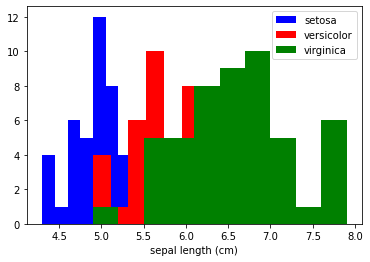

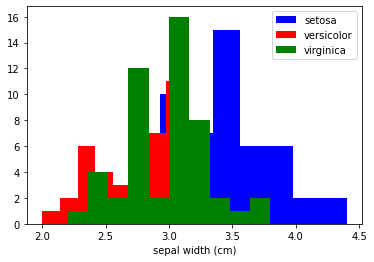

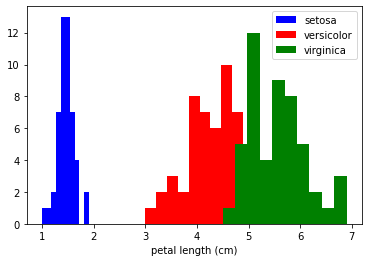

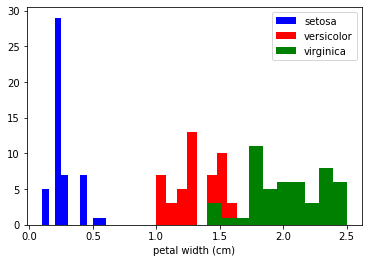

In [7]:
x_index = 0
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)
# x_index es la caracteristica seleccionada, son el ancho de los petalos, es la que tiene mejor correlacion para determinar la clase
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

x_index = 1
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)
# x_index es la caracteristica seleccionada, son el ancho de los petalos, es la que tiene mejor correlacion para determinar la clase
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

x_index = 2
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)
# x_index es la caracteristica seleccionada, son el ancho de los petalos, es la que tiene mejor correlacion para determinar la clase
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)
# x_index es la caracteristica seleccionada, son el ancho de los petalos, es la que tiene mejor correlacion para determinar la clase
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

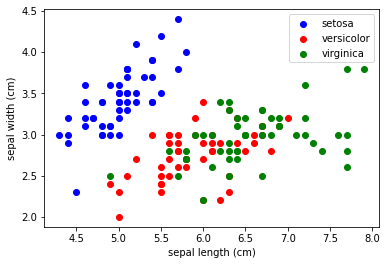

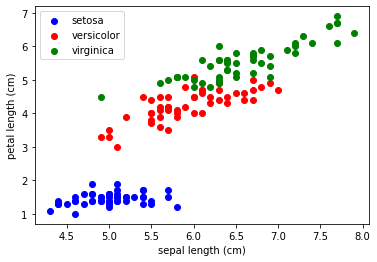

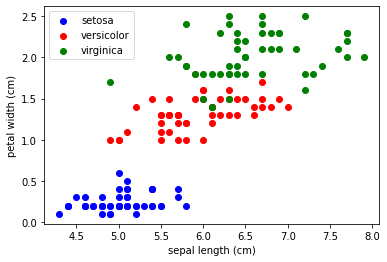

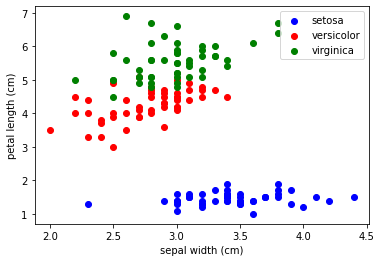

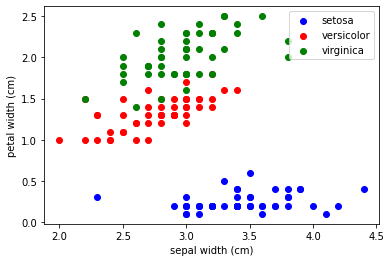

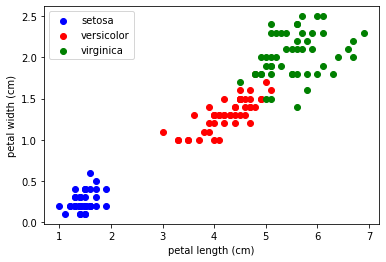

In [11]:
# En total son 6 scatter-plots
colors = ['blue', 'red', 'green']

# Plot1
x_index = 0
y_index = 1

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

# Plot2
x_index = 0
y_index = 2

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

# Plot3
x_index = 0
y_index = 3

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

# Plot4
x_index = 1
y_index = 2

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

# Plot5
x_index = 1
y_index = 3

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

# Plot5
x_index = 2
y_index = 3

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()
plt.show()

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
      <li>
      **Cambia** `x_index` **e** `y_index` ** en el script anterior y encuentra una combinación de los dos parámetros que separe de la mejor forma posible las tres clases.**
      </li>
      <li>
      Este ejercicio es un adelanto a lo que se denomina **reducción de dimensionalidad**, que veremos después.
      </li>
    </ul>
    </div>


<div class="alert alert-success">
     <b>Respuesta</b>:
     <ul>

<li>
Teniendo en cuenta las 6 gráficas hechas en el paso anterior, los parámetros que ayuden a separar mejor las 3 clases son: Petal length y Petal width. Debido a que en esta gráfica, se pueden apreciar mejor un patrón de clusters. 
</li>

<li>
Sin embargo, hay que tener en cuenta que la clase Virginica y la clase Versicolor tienen a superponerse. 
</li>

  </ul>
</div>

### Matrices scatterplot

En lugar de realizar los plots por separado, una herramienta común que utilizan los analistas son las **matrices scatterplot**.

Estas matrices muestran los scatter plots entre todas las características del dataset, así como los histogramas para ver la distribución de cada característica.

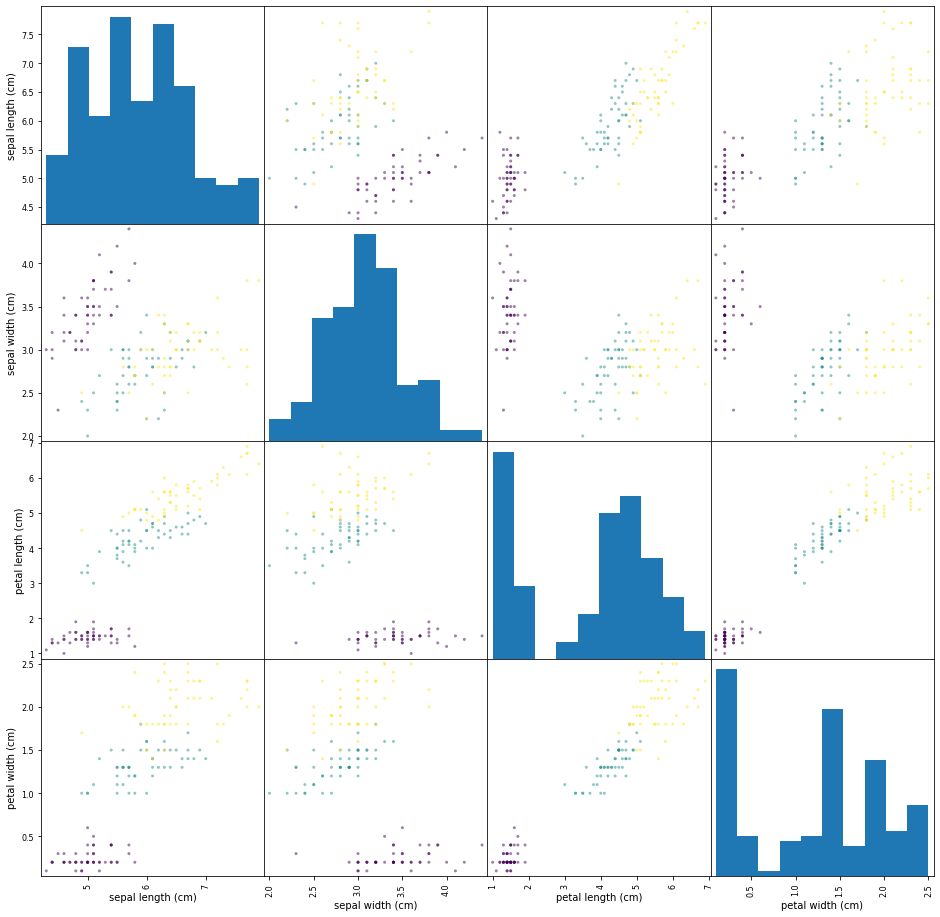

In [12]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(16, 16));

## Otros datasets disponibles

[Scikit-learn pone a disposición de la comunidad una gran cantidad de datasets](http://scikit-learn.org/stable/datasets/#dataset-loading-utilities). Vienen en tres modos:
- **Packaged Data:** pequeños datasets ya disponibles en la distribución de scikit-learn, a los que se puede acceder mediante ``sklearn.datasets.load_*``
- **Downloadable Data:** estos datasets son más grandes y pueden descargarse mediante herramientas que scikit-learn
  ya incluye.  Estas herramientas están en ``sklearn.datasets.fetch_*``
- **Generated Data:** estos datasets se generan mediante modelos basados en semillas aleatorias (datasets sintéticos). Están disponibles en ``sklearn.datasets.make_*``

Puedes explorar las herramientas de datasets de scikit-learn usando la funcionalidad de autocompletado que tiene IPython. Tras importar el paquete ``datasets`` de ``sklearn``, teclea

    datasets.load_<TAB>

o

    datasets.fetch_<TAB>

o

    datasets.make_<TAB>

para ver una lista de las funciones disponibles

In [14]:
from sklearn import datasets

Advertencia: muchos de estos datasets son bastante grandes y puede llevar bastante tiempo descargarlos.

Si comienzas una descarga con un libro de IPython y luego quieres detenerla, puedes utilizar la opción "kernel interrupt" accesible por el menú o con ``Ctrl-m i``.

Puedes presionar ``Ctrl-m h`` para una lista de todos los atajos ``ipython``.

## Cargando los datos de dígitos

Ahora vamos a ver otro dataset, donde podemos estudiar mejor como representar los datos. Podemos explorar los datos de la siguiente forma:

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))
print(digits.DESCR)

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

In [21]:
import numpy as np
print('Datos del primer digito', digits.data[0])
print('Etiquetas únicas: ', np.unique(digits.target))
print('Cantidad de datos por etiqueta: ', np.bincount(digits.target))

Datos del primer digito [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Etiquetas únicas:  [0 1 2 3 4 5 6 7 8 9]
Cantidad de datos por etiqueta:  [178 182 177 183 181 182 181 179 174 180]


Aquí la etiqueta es directamente el dígito que representa cada ejemplo. Los datos consisten en un array de longitud 64... pero, ¿qué significan estos datos?

Una pista viene dada por el hecho de que tenemos dos versiones de los datos:
``data`` y ``images``. Vamos a echar un vistazo a ambas:

In [22]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Podemos ver que son lo mismo, mediante un simple *reshaping*:

In [23]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Vamos a visualizar los datos. Es un poco más complejo que el scatter plot que hicimos anteriormente.

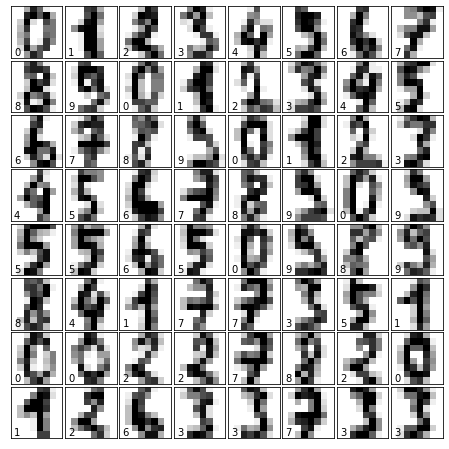

In [24]:
# Configurar la figura
fig = plt.figure(figsize=(6, 6))  # tamaño en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostrar algunos dígitos: cada imagen es de 8x8
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiquetar la imagen con el valor objetivo
    ax.text(0, 7, str(digits.target[i]))

Ahora podemos saber que significan las características. Cada característica es una cantidad real que representa la oscuridad de un píxel en una imagen 8x8 de un dígito manuscrito.

Aunque cada ejemplo tiene datos que son inherentemente de dos dimensiones, la matriz de datos incluye estos datos 2D en un **solo vector**, contenido en cada **fila** de la misma.

<div class="alert alert-success">
     <b>Ejercicio</b>:** trabajando con un dataset de reconocimiento facial**
     <ul>
      <li>
     **Vamos a pararnos a explorar el dataset de reconocimiento facial de Olivetti.
Descarga los datos (sobre 1.4MB), y visualiza las caras.
Puedes copiar el código utilizado para visualizar los dígitos, modificándolo convenientemente.**
      </li>
    </ul>
      </div>

<div class="alert alert-success">
     <b>Respuesta</b>:** trabajando con un dataset de reconocimiento facial**
     <ul>
      <li>
      
    </ul>
      </div>

In [25]:
from sklearn.datasets import fetch_olivetti_faces
caras = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [30]:
# descarga el dataset faces
print(caras.keys())

print(caras.data.shape)
print(caras.images.shape)
print(caras.target.shape)
print(caras.DESCR)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)
(400, 64, 64)
(400,)
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some s

In [27]:
n_samples, n_features = caras.data.shape
print((n_samples, n_features))
# Utiliza el script anterior para representar las caras
# Pista: plt.cm.bone es un buen colormap para este dataset


(400, 4096)


In [ ]:
print(caras.data[0])
print(caras.target)

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 

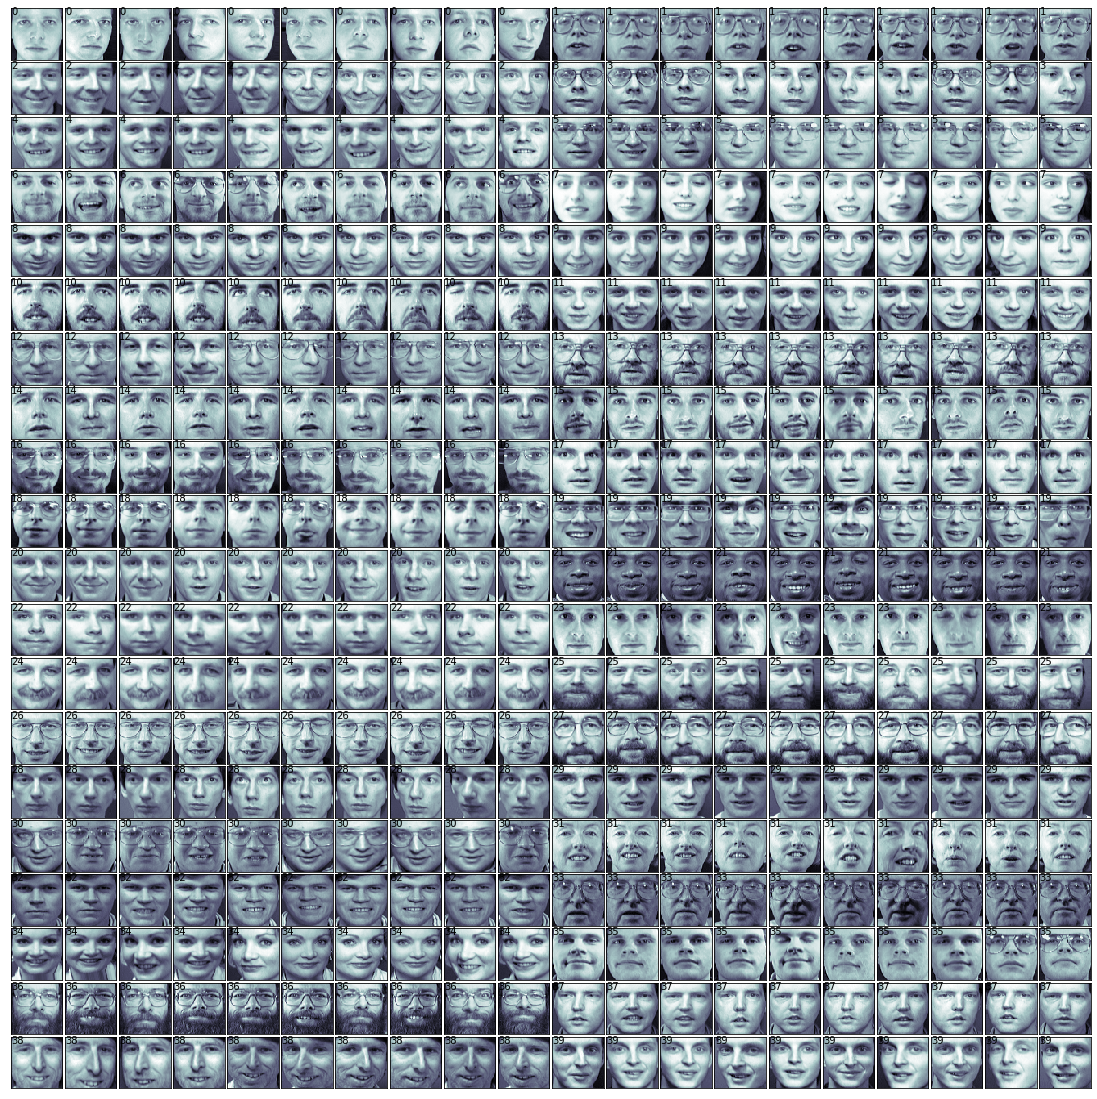

In [31]:
# Configurar la figura
fig = plt.figure(figsize=(15, 15))  # tamaño en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostrar  las imagenes
#cada imagen es de 8x8
# se muestran las 400 imagenes
for i in range(400):
    #cantidad de imagenes en una fila y columna
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[]) 
    ax.imshow(caras.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # Etiquetar la imagen con el valor objetivo
    ax.text(0, 7, str(caras.target[i]))